# Определение перспективного тарифа для телеком-компании

## Описание проекта 
___
Вы аналитик компании *«Мегалайн»* — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: *«Смарт»* и *«Ультра»*. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей *«Мегалайна»*: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
___
**Тариф «Смарт»:**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
 * минута разговора: 3 рубля
 * сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей

<br>**Тариф «Ультра»:**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль
 * сообщение: 1 рубль
 * 1 Гб интернет-трафика: 150 рублей

<br>

**Примечание**

* *«Мегалайн»* всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
* Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Изучение исходных данных 

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from functools import reduce

### Загрузка данных
Прочитаем файлы `/calls.csv`, `/internet.csv`,`/messages.csv`,`/tariffs.csv`,`/users.csv` из папки `/datasets` и сохраним их в переменных соответственно `df_calls`, `df_internet`, `df_messages`, `df_tariffs` и `df_users`. 
<br>Для того что бы не получать ошибки при загрузке файла, то локально, то с сервера, используем следующий код:

In [2]:
import os

pth1 = '/datasets/calls.csv'
pth2 = './calls.csv'
pth3 = '/datasets/internet.csv'
pth4 = './internet.csv'
pth5 = '/datasets/messages.csv'
pth6 = './messages.csv'
pth7 = '/datasets/tariffs.csv'
pth8 = './tariffs.csv'
pth9 = '/datasets/users.csv'
pth10 = './users.csv'

if os.path.exists(pth1):
    df_calls = pd.read_csv(pth1)    
elif os.path.exists(pth2):
    df_calls = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

if os.path.exists(pth3):
    df_internet = pd.read_csv(pth3)    
elif os.path.exists(pth4):
    df_internet = pd.read_csv(pth4)
else:
    print("Проверьте правильность пути к датасету")
    
if os.path.exists(pth5):
    df_messages = pd.read_csv(pth5)    
elif os.path.exists(pth6):
    df_messages = pd.read_csv(pth6)
else:
    print("Проверьте правильность пути к датасету")

if os.path.exists(pth7):
    df_tariffs = pd.read_csv(pth7)    
elif os.path.exists(pth8):
    df_tariffs = pd.read_csv(pth8)
else:
    print("Проверьте правильность пути к датасету")
    
if os.path.exists(pth9):
    df_users = pd.read_csv(pth9)    
elif os.path.exists(pth10):
    df_users = pd.read_csv(pth10)
else:
    print("Проверьте правильность пути к датасету")


### Изучение данных
Создадим функицию *`info`*, позволяющую проводить первичный анализ исходных данных:

In [3]:
def info(data):
    print('Первые 5 строк:')
    display(data.head())
    print('информация:')
    display(data.info())
    print('общие параметры:')
    print(data.describe())
    print(data.columns)
    print('Пропущенные значения:')
    display(pd.DataFrame(round((data.isna().mean()*100),2),columns=['NaNs,%']).style.format('{:.2f}'))

Применим функцию `info()` к нашим датафреймам:

In [4]:
data = (df_calls,df_internet,df_messages,df_tariffs,df_users)
for i in data:
    display(info(i))

Первые 5 строк:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

общие параметры:
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
Пропущенные значения:


,"NaNs,%"
id,0.00
call_date,0.00
duration,0.00
user_id,0.00


None

Первые 5 строк:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

общие параметры:
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
Пропущенные значения:


,"NaNs,%"
Unnamed: 0,0.00
id,0.00
mb_used,0.00
session_date,0.00
user_id,0.00


None

Первые 5 строк:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

общие параметры:
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
Index(['id', 'message_date', 'user_id'], dtype='object')
Пропущенные значения:


,"NaNs,%"
id,0.00
message_date,0.00
user_id,0.00


None

Первые 5 строк:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

общие параметры:
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
count         2.000000    2.000000         2.000000        2.000000  
mean       1250.000000  175.000000         2.000000        2.000000  
std         989.949494   35.355339         1.414214        1.414214  
min         550.000000  150.000000         1.000000        1.000000  
25%        

,"NaNs,%"
messages_included,0.00
mb_per_month_included,0.00
minutes_included,0.00
rub_monthly_fee,0.00
rub_per_gb,0.00
rub_per_message,0.00
rub_per_minute,0.00
tariff_name,0.00


None

Первые 5 строк:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

общие параметры:
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
Пропущенные значения:


,"NaNs,%"
user_id,0.00
age,0.00
churn_date,92.40
city,0.00
first_name,0.00
last_name,0.00
reg_date,0.00
tariff,0.00


None

Познакомимся с данными и сделаем выводы на основе первичного анализа, определим какие корректировки необходимо внести:

<br>1. Таблица `df_calls` (информация о звонках) содержит следующие данные:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Столбец `call_date` надо перевести из типа object в *datetime64*. В соответствии с Примечанием необхидимо округлить длительность звонка. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Следовательно округляем в большую сторону и перевести в *int*. Пропущенные значения в таблице `df_calls` отсутствуют. Всего в таблице 202607 абонентов.

<br>2. Таблица `df_internet` (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя 

Столбец `session_date` надо перевести из типа object в *datetime64*. В соответствии с Примечанием необхидимо округлить общую сумму за месяц в большую сторону и перевести в int. Для веб-трафика отдельные сессии не считаются.  Пропущенные значения в таблице `df_internet` отсутствуют. Всего в таблице 149396 абонентов.

<br>3. Таблица `df_messages` (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Столбец `message_date` надо перевести из типа object в *datetime64*. Пропущенные значения в таблице `df_messages` отсутствуют. Всего в таблице 123036 абонентов.

<br>4. Таблица `df_tariffs` (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) 

Таблица `df_tariffs`содержит две строки с описанием тарифов. Пропущенных значений нет. 

<br>5. Таблица `df_users` (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Столбец `reg_date` и `churn_date` надо перевести из типа object в *datetime64*. `churn_date` содержит пропущенные значения, т.к. 92,4% пользователей продолжают использовать тариф на момент создания базы данных. В исследовании учавствуют данные о 500 пользователях. Все таблицы кроме `df_tariffs` связаны между собой столбцом `user_id`.

### Вывод
В разделе выше изучили исходные данные и определили необходимые преобразования. 

## Предобработка данных
В этом пункте:
* Приведем данные к нужным типам.
* Найдем и исправим ошибки в данных, если они есть.
(При необходимости предоставить пояснение, какие ошибки были обнаружены и как их исправили). В данных присутствуют звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
* Посчитаем для каждого пользователя:
 * количество сделанных звонков и израсходованных минут разговора по месяцам;
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам;
 * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Приведем данные к нужным типам, описанным в шаге 1. 
<br>Прелобразования в таблице `df_calls`:

In [5]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Проведем преобразования с таблицей `df_internet`:

In [6]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['weekday'] = df_internet['session_date'].dt.weekday
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['year'] = df_internet['session_date'].dt.year
df_internet['session_date'].describe(datetime_is_numeric=True)

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

Данные представлены за 2018 год, поэтому здесь допустимо использование метода `month`. Для каждого месяца посчитаем трафик и округлим для каждого клиента в большую сторону за месяц.

In [7]:
df_internet_pivot_table = (df_internet
                           .pivot_table(index = ['user_id','month'], values='mb_used',aggfunc=['sum'])\
                           .reset_index(level=1)
                          )
df_internet_pivot_table.columns=['month','total_traffic']
df_internet_pivot_table['total_traffic'] = (
    df_internet_pivot_table['total_traffic']
    .apply(np.ceil).astype('int')
)
df_internet_pivot_table.head()

,month,total_traffic
user_id,,
1000,5,2254
1000,6,23234
1000,7,14004
1000,8,14056
1000,9,14569


Проведем преобразования с `df_messages`: 

In [8]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Проведем преобразования с `df_users`: 

In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Ошибки в данных не обнаружены, перейдем к дорасчету необходимых данных.

### Дорасчет данных
Определим для таблицы `df_calls` количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя:

In [34]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls_pivot_table_1 = df_calls.pivot_table(index = ['user_id','month'], values=['duration'],aggfunc=['sum'])\
.reset_index(level=1)
df_calls_pivot_table_1.columns=['month','total_duration']
df_calls_pivot_table_2 = df_calls.pivot_table(index = ['user_id','month'], values=['id'],aggfunc=['count'])\
.reset_index(level=1)
df_calls_pivot_table_2.columns=['month','number_calls']
df_calls_pivot_table = df_calls_pivot_table_1.merge(df_calls_pivot_table_2, on=['user_id','month'])
df_calls_pivot_table.head(10)

,month,total_duration,number_calls
user_id,,,
1000,5,159,22
1000,6,172,43
1000,7,340,47
1000,8,408,52
1000,9,466,58
1000,10,350,57
1000,11,338,43
1000,12,333,46
1001,11,430,59


In [11]:
month = (df_calls
         .groupby(['user_id', 'month'])
         .agg({'duration':'sum', 'id':'count'})
         .rename(columns={'duration':'total_duration','id':'number_calls'})
        )
month.head(10)

total_duration  number_calls
user_id month                              
1000    5                 159            22
        6                 172            43
        7                 340            47
        8                 408            52
        9                 466            58
        10                350            57
        11                338            43
        12                333            46
1001    11                430            59
        12                414            63

3. Определим для таблицы `df_messages` количество отправленных сообщений по месяцам для каждого пользователя:

In [12]:
month = df_messages['message_date'].dt.month
df_messages['month'] = month
df_messages_pivot_table = df_messages.pivot_table(index = ['user_id','month'], values=['id'],aggfunc=['count'])\
.reset_index(level=1)
df_messages_pivot_table.columns=['month','total_messages']
df_messages_pivot_table.head()

,month,total_messages
user_id,,
1000,5,22
1000,6,60
1000,7,75
1000,8,81
1000,9,57


4. Определим помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану):

In [13]:
#Выведем таблицы, которые требуются на данном шаге:
display(df_tariffs)
display(df_users.head())
display(df_messages_pivot_table.head())
display(df_internet_pivot_table.head())
df_calls_pivot_table.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,month,total_messages
user_id,,
1000,5,22
1000,6,60
1000,7,75
1000,8,81
1000,9,57


,month,total_traffic
user_id,,
1000,5,2254
1000,6,23234
1000,7,14004
1000,8,14056
1000,9,14569


,month,total_duration,number_calls
user_id,,,
1000,5,159,22
1000,6,172,43
1000,7,340,47
1000,8,408,52
1000,9,466,58


In [14]:
#задаем index
df_users.set_index('user_id',inplace=True)

In [15]:
df_users

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...
1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart


In [16]:
#создадим сводную таблицу из трех:
data_frames = [df_messages_pivot_table, df_internet_pivot_table, df_calls_pivot_table]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'],
                                            how='inner'), data_frames)
df_merged 

,month,total_messages,total_traffic,total_duration,number_calls
user_id,,,,,
1000,5,22,2254,159,22
1000,6,60,23234,172,43
1000,7,75,14004,340,47
1000,8,81,14056,408,52
1000,9,57,14569,466,58
...,...,...,...,...,...
1498,10,42,20580,247,41
1499,9,11,1846,70,9
1499,10,48,17789,449,68


In [17]:
# объединяем основной тадафрейм и данные по абонентам
df_merged_users = df_users.merge(df_merged, on=['user_id'])
df_merged_users

,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_messages,total_traffic,total_duration,number_calls
user_id,,,,,,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,2254,159,22
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,60,23234,172,43
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,75,14004,340,47
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,81,14056,408,52
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,57,14569,466,58
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,42,20580,247,41
1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11,1846,70,9
1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,48,17789,449,68


In [18]:
# обновляем индекс
df_merged_users = df_merged_users.reset_index()

In [19]:
# Переименовываем столбец tariff и объединяем основной датафрейм и информацию по тарифам
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})
df_merged_users_tariff = df_merged_users.merge(df_tariffs, on=['tariff'],)
df_merged_users_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_messages,total_traffic,total_duration,number_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,2254,159,22,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,60,23234,172,43,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,75,14004,340,47,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,81,14056,408,52,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,57,14569,466,58,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,42,20580,247,41,50,15360,500,550,200,3,3
2663,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11,1846,70,9,50,15360,500,550,200,3,3
2664,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,48,17789,449,68,50,15360,500,550,200,3,3
2665,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,59,17964,612,74,50,15360,500,550,200,3,3


In [20]:
# Расчитываем расходы по минутам, гигобайтам и сообщениям
df_merged_users_tariff['extra_time_call'] = (df_merged_users_tariff['total_duration'] 
                                            - df_merged_users_tariff['minutes_included'])
df_merged_users_tariff['extra_messages'] = (df_merged_users_tariff['total_messages'] 
                                            - df_merged_users_tariff['messages_included'])
df_merged_users_tariff['extra_internet'] = ((df_merged_users_tariff['total_traffic'] 
                                            - df_merged_users_tariff['mb_per_month_included'])
                                            /1024).apply(np.ceil)

#функция, отсекающая элементы входящее в тариф
def extra_time(time):
    if time <= 0:
        return 0
    return time

df_merged_users_tariff['extra_time_call'] = df_merged_users_tariff['extra_time_call'].apply(extra_time)
df_merged_users_tariff['extra_messages'] = df_merged_users_tariff['extra_messages'].apply(extra_time)
df_merged_users_tariff['extra_internet'] = df_merged_users_tariff['extra_internet'].apply(extra_time)

# Считаем стоимость дополнительного пакета
df_merged_users_tariff['extra_cost_calls_total'] = (
    df_merged_users_tariff['rub_per_minute']*
    df_merged_users_tariff['extra_time_call']
)

df_merged_users_tariff['extra_messages_cost_total'] = (
    df_merged_users_tariff['rub_per_message']*
    df_merged_users_tariff['extra_messages']
)

df_merged_users_tariff['extra_cost_internet_total'] = (
    df_merged_users_tariff['rub_per_gb']
     *df_merged_users_tariff['extra_internet']
)

#Считаем полную стоимость для каждого абонента
df_merged_users_tariff['total_cost'] = (
    df_merged_users_tariff['rub_monthly_fee'] + 
    df_merged_users_tariff['extra_cost_calls_total'] +
    df_merged_users_tariff['extra_messages_cost_total'] +
    df_merged_users_tariff['extra_cost_internet_total']
)
df_merged_users_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_messages,...,rub_per_gb,rub_per_message,rub_per_minute,extra_time_call,extra_messages,extra_internet,extra_cost_calls_total,extra_messages_cost_total,extra_cost_internet_total,total_cost
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,...,150,1,1,0,0,0.0,0,0,0.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,60,...,150,1,1,0,0,0.0,0,0,0.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,75,...,150,1,1,0,0,0.0,0,0,0.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,81,...,150,1,1,0,0,0.0,0,0,0.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,57,...,150,1,1,0,0,0.0,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,42,...,200,3,3,0,0,6.0,0,0,1200.0,1750.0
2663,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11,...,200,3,3,0,0,0.0,0,0,0.0,550.0
2664,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,48,...,200,3,3,0,0,3.0,0,0,600.0,1150.0
2665,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,59,...,200,3,3,112,9,3.0,336,27,600.0,1513.0


In [21]:
df_merged_users_tariff.describe()

,user_id,age,month,total_messages,total_traffic,total_duration,number_calls,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,extra_time_call,extra_messages,extra_internet,extra_cost_calls_total,extra_messages_cost_total,extra_cost_internet_total,total_cost
count,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,...,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.00000
mean,1255.517435,46.615298,8.341582,45.216723,17190.628046,459.332208,64.173228,317.866517,19690.978628,1204.911886,...,185.901762,2.436070,2.436070,29.898013,4.847394,2.323960,89.694038,14.542182,455.493063,1504.47994
std,146.273501,16.469860,2.897720,34.464757,7244.903632,237.551341,32.621554,427.538604,6912.624158,1125.101588,...,22.502032,0.900081,0.900081,73.779334,12.475225,3.508755,221.338003,37.425675,688.903591,796.07941
min,1000.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,50.000000,15360.000000,500.000000,...,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.00000
25%,1127.000000,32.000000,6.000000,19.000000,12536.500000,295.000000,42.000000,50.000000,15360.000000,500.000000,...,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,747.50000
50%,1266.000000,47.000000,9.000000,38.000000,16902.000000,450.000000,63.000000,50.000000,15360.000000,500.000000,...,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1550.00000
75%,1384.000000,61.000000,11.000000,63.000000,21338.000000,592.000000,82.000000,1000.000000,30720.000000,3000.000000,...,200.000000,3.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,800.000000,1950.00000
max,1499.000000,75.000000,12.000000,224.000000,49746.000000,1673.000000,244.000000,1000.000000,30720.000000,3000.000000,...,200.000000,3.000000,3.000000,935.000000,93.000000,23.000000,2805.000000,279.000000,4600.000000,6770.00000


Построим гистограмму суммарной стоимости тарифа в месяц для каждого клиента:

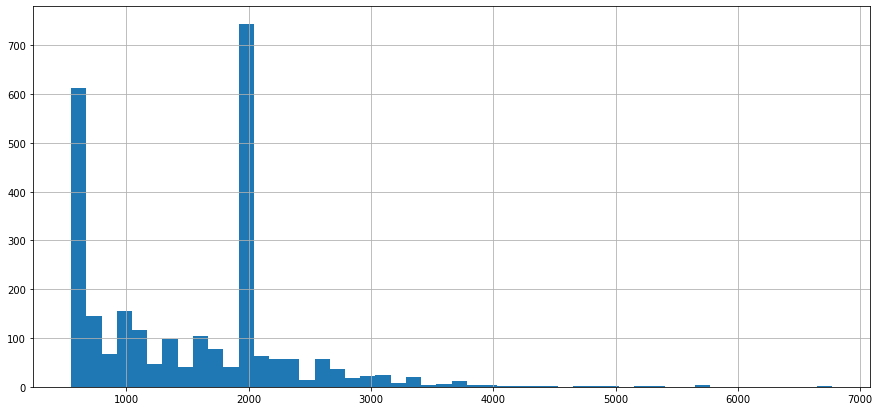

In [22]:
df_merged_users_tariff['total_cost'].hist(bins=50,figsize=(15,7));

На гистограмме абонентской платы в месяц четко видны два пика, соответсвующие базовым ценам на оба тарифа (ultra - 1950; smart - 550).

### Вывод
На данном этапе были прведены необходимые преобразования и дорасчет значений. По итогам шага 2 сформирована сводная таблица для дальнейшего анализа. В таблице представлена информация о: суммарном трафике интернета, количестве сообщений и длительности звонков, суммарная стоимость абонентской платы в месяц, месяц (порядковый номер), ID-абонента, город и тариф.

## Шаг 3. Проанализируйте данные
<br>Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? <br>Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения. Сделаем выводы.

Создадим два среза датафрейма для тарифа ultra и smart. Построим гистограммы для двух тарифов:

In [23]:
df_cost_pivot_table_users_ultra = df_merged_users_tariff.query('tariff == "ultra"')
df_cost_pivot_table_users_smart = df_merged_users_tariff.query('tariff == "smart"')

Дисперсия длительности звонков для тарифа ultra: 97129.07948838561
Дисперсия длительности звонков для тарифа smart: 35217.697470430714
Стандартное отклонение длительности звонков для тарифа ultra: 311.6553857843397
Стандартное отклонение длительности звонков для тарифа smart: 187.66378838345642
Среднее длительности звонков для тарифа ultra: 556.8577127659574
Среднее длительности звонков для тарифа smart: 421.0349869451697
Медиана длительности звонков для тарифа ultra: 537.5
Медиана длительности звонков для тарифа smart: 427.0


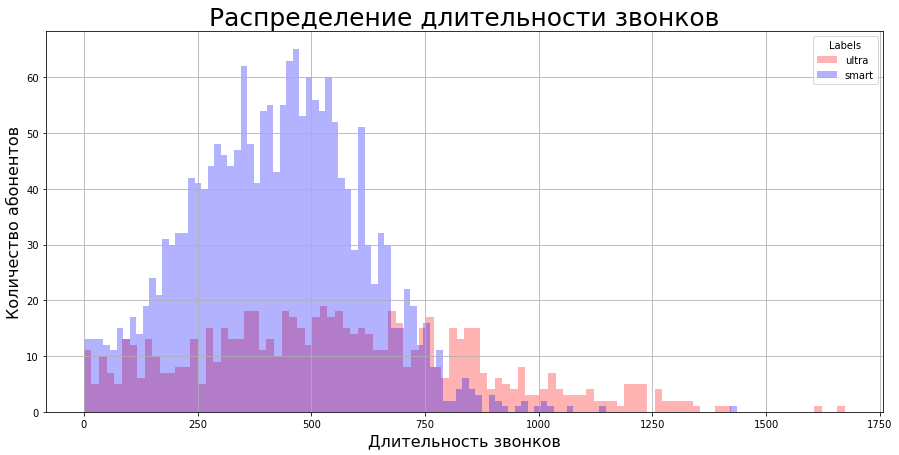

In [24]:
#Дисперсия - средний квадрат расстояние между значениями датасета и средним.
#Дисперсию совокупности рассчитывают методом var() (от англ. variance — «дисперсия»):
variance_calls_ultra = np.var(df_cost_pivot_table_users_ultra['total_duration'])
variance_calls_smart = np.var(df_cost_pivot_table_users_smart['total_duration'])
print('Дисперсия длительности звонков для тарифа ultra:',variance_calls_ultra)
print('Дисперсия длительности звонков для тарифа smart:',variance_calls_smart)

#Стандартное отклонение находят методом std() (от англ. standard deviation, «стандартное отклонение»):
standard_deviation_calls_ultra = np.std(df_cost_pivot_table_users_ultra['total_duration'])
standard_deviation_calls_smart = np.std(df_cost_pivot_table_users_smart['total_duration'])
print('Стандартное отклонение длительности звонков для тарифа ultra:',standard_deviation_calls_ultra)
print('Стандартное отклонение длительности звонков для тарифа smart:',standard_deviation_calls_smart)

#Среднее:
mean_calls_ultra = df_cost_pivot_table_users_ultra['total_duration'].mean()
mean_calls_smart = df_cost_pivot_table_users_smart['total_duration'].mean()
print('Среднее длительности звонков для тарифа ultra:',mean_calls_ultra)
print('Среднее длительности звонков для тарифа smart:',mean_calls_smart)

#Медиана:
median_calls_ultra = df_cost_pivot_table_users_ultra['total_duration'].median()
median_calls_smart = df_cost_pivot_table_users_smart['total_duration'].median()
print('Медиана длительности звонков для тарифа ultra:',median_calls_ultra)
print('Медиана длительности звонков для тарифа smart:',median_calls_smart)

#Гистограмма
df_cost_pivot_table_users_ultra['total_duration'].hist(bins=100,figsize=(15,7),alpha=0.3,color="r")
df_cost_pivot_table_users_smart['total_duration'].hist(bins=100,figsize=(15,7),alpha=0.3,color="b")
plt.legend(['ultra', 'smart'],loc='upper right', title='Labels')

# добавляем подписи к осям и заголовок гистограммы
plt.xlabel('Длительность звонков', fontsize=16)
plt.ylabel('Количество абонентов', fontsize=16)
plt.title('Распределение длительности звонков', fontsize=25);


In [25]:
# Выведем сводную таблицу по всем метрикам:
(
    df_merged_users_tariff
    .groupby("tariff")
    .agg({
        "total_messages": ["min", "max", "mean", "var", "std"],
        "total_traffic": ["min", "max", "mean", "var", "std"],
        "total_duration": ["min", "max", "mean", "var", "std"],
        "total_cost": ["min", "max", "mean", "var", "std"]
    })
)


total_messages                                         total_traffic  \
                  min  max       mean          var        std           min   
tariff                                                                        
smart               1  143  38.767102   718.803619  26.810513             0   
ultra               1  224  61.640957  2008.550011  44.816850             0   

                                                       total_duration        \
          max          mean           var          std            min   max   
tariff                                                                        
smart   38553  16245.728982  3.355900e+07  5793.012935              0  1435   
ultra   49746  19596.853723  9.272831e+07  9629.554016              0  1673   

                                             total_cost                       \
              mean           var         std        min     max         mean   
tariff                                                                         
smart   421.034987  35236.097521  187.712806      550.0  6770.0  1290.677807   
ultra   556.857713  97258.412484  311.862810     1950.0  4800.0  2048.936170   

                                   
                  var         std  
tariff                             
smart   677052.568551  822.832042  
ultra   110817.774882  332.893038

Голубая гистограмма соответствует тарифу smart. Распределена нормально со средним около 480 минут и дисперсией сигма в квадрате достаточно малым. Можно наблюдать скошенность влево. Датасет скошен вправо, т.к. среднее больше медианы. <br>Розовая гистограмма соответствует тарифу ultra. Распределена нормально со средним около 530 минут и дисперсией сигма в квадрате достаточно большим (поэтому график более размазанный). Датасет скошен влево, т.к. среднее меньше медианы, но незначительно.

Дисперсия количества сообщений для тарифа ultra: 2005.8790671684044
Дисперсия количества сообщений для тарифа smart: 718.4282649687415
Стандартное отклонение количества сообщений для тарифа ultra: 44.78704128616228
Стандартное отклонение количества сообщений для тарифа smart: 26.803512175995547
Среднее количества сообщений для тарифа ultra: 61.640957446808514
Среднее количества сообщений для тарифа smart: 38.76710182767624
Медиана количества сообщений для тарифа ultra: 53.0
Медиана количества сообщений для тарифа smart: 34.0


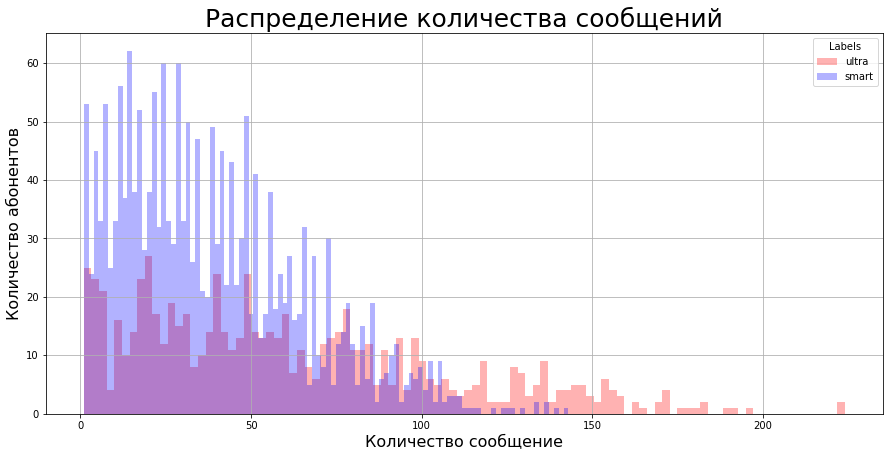

In [26]:
#Дисперсия:
variance_messages_ultra = np.var(df_cost_pivot_table_users_ultra['total_messages'])
variance_messages_smart = np.var(df_cost_pivot_table_users_smart['total_messages'])
print('Дисперсия количества сообщений для тарифа ultra:',variance_messages_ultra)
print('Дисперсия количества сообщений для тарифа smart:',variance_messages_smart)

#Стандартное отклонение:
standard_deviation__messages_ultra = np.std(df_cost_pivot_table_users_ultra['total_messages'])
standard_deviation__messages_smart = np.std(df_cost_pivot_table_users_smart['total_messages'])
print('Стандартное отклонение количества сообщений для тарифа ultra:',standard_deviation__messages_ultra)
print('Стандартное отклонение количества сообщений для тарифа smart:',standard_deviation__messages_smart)

#Среднее:
mean_messages_ultra = df_cost_pivot_table_users_ultra['total_messages'].mean()
mean_messages_smart = df_cost_pivot_table_users_smart['total_messages'].mean()
print('Среднее количества сообщений для тарифа ultra:',mean_messages_ultra)
print('Среднее количества сообщений для тарифа smart:',mean_messages_smart)

#Медиана:
median_messages_ultra = df_cost_pivot_table_users_ultra['total_messages'].median()
median_messages_smart = df_cost_pivot_table_users_smart['total_messages'].median()
print('Медиана количества сообщений для тарифа ultra:',median_messages_ultra)
print('Медиана количества сообщений для тарифа smart:',median_messages_smart)

#Гистограмма
df_cost_pivot_table_users_ultra['total_messages'].hist(bins=100,figsize=(15,7),alpha=0.3,color="r",label='ultra')
df_cost_pivot_table_users_smart['total_messages'].hist(bins=100,figsize=(15,7),alpha=0.3,color="b",label='smart')
plt.legend(['ultra', 'smart'],loc='upper right', title='Labels')

# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Количество сообщение', fontsize=16)
plt.ylabel('Количество абонентов', fontsize=16)
plt.title('Распределение количества сообщений', fontsize=25);

Голубая гистограмма соответствует тарифу smart. Распределение Пуассона.<br>Розовая гистограмма соответствует тарифу ultra. Распределение Пуассона, сигма в квадрате достаточно большим (поэтому график более размазанный). Датасеты скошены вправо, т.к. средние больше медиан.

Дисперсия количества интернет трафика для тарифа ultra: 92605001.62222028
Дисперсия количества интернет трафика для тарифа smart: 33541474.57876841
Стандартное отклонение количества интернет трафика для тарифа ultra: 9623.149256985484
Стандартное отклонение количества интернет трафика для тарифа smart: 5791.500201050537
Среднее количества интернет трафика для тарифа ultra: 19596.853723404256
Среднее количества интернет трафика для тарифа smart: 16245.728981723238
Медиана количества интернет трафика для тарифа ultra: 19443.0
Медиана количества интернет трафика для тарифа smart: 16462.0


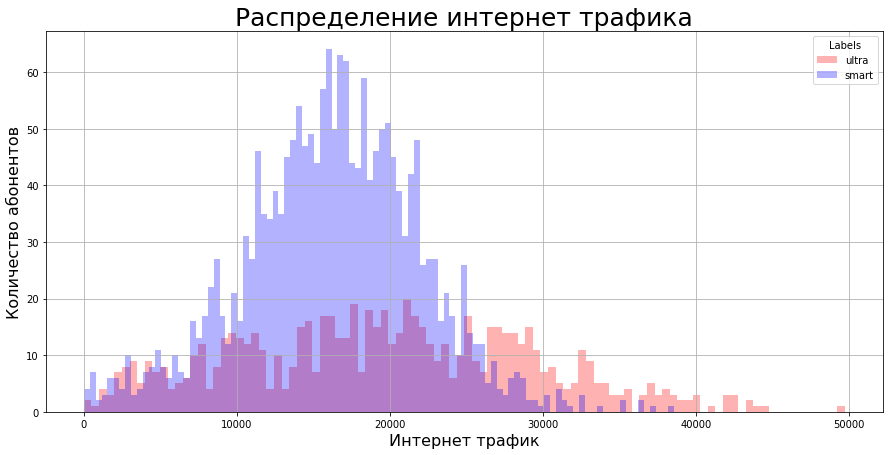

In [27]:
#Дисперсия:
variance_traffic_ultra = np.var(df_cost_pivot_table_users_ultra['total_traffic'])
variance_traffic_smart = np.var(df_cost_pivot_table_users_smart['total_traffic'])
print('Дисперсия количества интернет трафика для тарифа ultra:',variance_traffic_ultra)
print('Дисперсия количества интернет трафика для тарифа smart:',variance_traffic_smart)

#Стандартное отклонение:
standard_deviation__traffic_ultra = np.std(df_cost_pivot_table_users_ultra['total_traffic'])
standard_deviation__traffic_smart = np.std(df_cost_pivot_table_users_smart['total_traffic'])
print('Стандартное отклонение количества интернет трафика для тарифа ultra:',standard_deviation__traffic_ultra)
print('Стандартное отклонение количества интернет трафика для тарифа smart:',standard_deviation__traffic_smart)

#Среднее:
mean_traffic_ultra = df_cost_pivot_table_users_ultra['total_traffic'].mean()
mean_traffic_smart = df_cost_pivot_table_users_smart['total_traffic'].mean()
print('Среднее количества интернет трафика для тарифа ultra:',mean_traffic_ultra)
print('Среднее количества интернет трафика для тарифа smart:',mean_traffic_smart)

#Медиана:
median_traffic_ultra = df_cost_pivot_table_users_ultra['total_traffic'].median()
median_traffic_smart = df_cost_pivot_table_users_smart['total_traffic'].median()
print('Медиана количества интернет трафика для тарифа ultra:',median_traffic_ultra)
print('Медиана количества интернет трафика для тарифа smart:',median_traffic_smart)

#Гистограмма
df_cost_pivot_table_users_ultra['total_traffic'].hist(bins=100,figsize=(15,7),alpha=0.3,color="r",label='ultra')
df_cost_pivot_table_users_smart['total_traffic'].hist(bins=100,figsize=(15,7),alpha=0.3,color="b",label='smart')
plt.legend(['ultra', 'smart'],loc='upper right', title='Labels')

# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Интернет трафик', fontsize=16)
plt.ylabel('Количество абонентов', fontsize=16)
plt.title('Распределение интернет трафика', fontsize=25);

Голубая гистограмма соответствует тарифу smart. Распределена нормально со средним около 18000 мбайт и дисперсией сигма в квадрате достаточно малым. Симметричный. Датасет скошен вправо, т.к. среднее больше медианы, но незначительно.
<br>Розовая гистограмма соответствует тарифу ultra. Распределена нормально со средним около 22000 мбайт и дисперсией сигма в квадрате достаточно большим (поэтому график более размазанный). Датасет скошен влево, т.к. среднее меньше медианы, но незначительно.

Дисперсия абонентской платы для тарифа ultra: 110670.41081937596
Дисперсия абонентской платы для тарифа smart: 676699.0162959726
Стандартное отклонение абонентской платы для тарифа ultra: 332.6716261110586
Стандартное отклонение абонентской платы для тарифа smart: 822.61717481218
Среднее количества абонентской платы для тарифа ultra: 2048.936170212766
Среднее количества абонентской платы для тарифа smart: 1290.6778067885118
Медиана количества абонентской платы для тарифа ultra: 1950.0
Медиана количества абонентской платы для тарифа smart: 1012.0


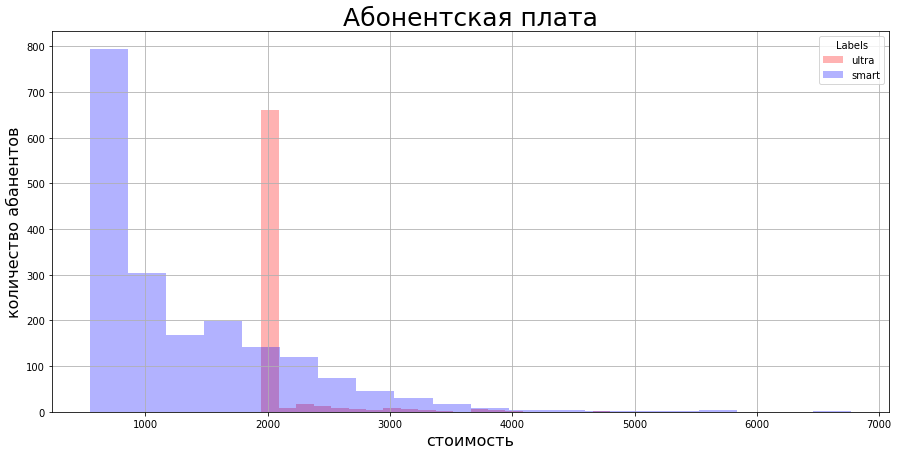

In [28]:
#Дисперсия:
variance_total_cost_ultra = np.var(df_cost_pivot_table_users_ultra['total_cost'])
variance_total_cost_smart = np.var(df_cost_pivot_table_users_smart['total_cost'])
print('Дисперсия абонентской платы для тарифа ultra:',variance_total_cost_ultra)
print('Дисперсия абонентской платы для тарифа smart:',variance_total_cost_smart)

#Стандартное отклонение:
standard_deviation_total_cost_ultra = np.std(df_cost_pivot_table_users_ultra['total_cost'])
standard_deviation_total_cost_smart = np.std(df_cost_pivot_table_users_smart['total_cost'])
print('Стандартное отклонение абонентской платы для тарифа ultra:',standard_deviation_total_cost_ultra)
print('Стандартное отклонение абонентской платы для тарифа smart:',standard_deviation_total_cost_smart)

#Среднее:
mean_traffic_ultra = df_cost_pivot_table_users_ultra['total_cost'].mean()
mean_traffic_smart = df_cost_pivot_table_users_smart['total_cost'].mean()
print('Среднее количества абонентской платы для тарифа ultra:',mean_traffic_ultra)
print('Среднее количества абонентской платы для тарифа smart:',mean_traffic_smart)

#Медиана:
median_traffic_ultra = df_cost_pivot_table_users_ultra['total_cost'].median()
median_traffic_smart = df_cost_pivot_table_users_smart['total_cost'].median()
print('Медиана количества абонентской платы для тарифа ultra:',median_traffic_ultra)
print('Медиана количества абонентской платы для тарифа smart:',median_traffic_smart)

#Гистограмма
df_cost_pivot_table_users_ultra['total_cost'].hist(bins=20,figsize=(15,7),alpha=0.3,color="r",label='ultra')
df_cost_pivot_table_users_smart['total_cost'].hist(bins=20,figsize=(15,7),alpha=0.3,color="b",label='smart')
plt.legend(['ultra', 'smart'],loc='upper right', title='Labels')

# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('стоимость', fontsize=16)
plt.ylabel('количество абанентов', fontsize=16)
plt.title('Абонентская плата', fontsize=25);

Голубая гистограмма соответствует тарифу smart. Розовая гистограмма соответствует тарифу ultra. Распределение Пуассона. Датасеты скошены вправо, т.к. средние больше медиан. Четкие максимумы в 550 и 1950.

### Вывод
Абонентам тарифа ultra в среднем требуется:
* пакет интернета - 19 Гб
* пакет сообщений - 60 сообщений
* количество минут - 560 минут

Абонентам тарифа smart в среднем требуется:
* пакет интернета - 16 Гб
* пакет сообщений - 40 сообщений
* количество минут - 420 минут

### Шаг 4. Проверьте гипотезы
<br>Пороговое значение alpha примем равное 0,05.
Сформулируем гипотезы:
* Сформулируем нулевую гипотезу H0: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
* Сформулируем альтернативную гипотезу H1: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.
<br><br>
* Сформулируем нулевую гипотезу H0: Cредняя выручка пользователей из Москвы равна выручки пользователей из других регионов.
* Сформулируем альтернативную гипотезу H1: Cредняя выручка пользователей из Москвы не равна выручки пользователей из других регионов.
<br><br>
Для проверки гипотиз выбираем специальный метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). Выполняются условия для использования данного метода. Генеральные совокупности не зависят друг от друга. Выборочные средние нормально распределены. Выборки разного размера и дисперсии у совокупностей сильно различаются, поэтому указываем equal_var равный False.

1. Сформулируем нулевую гипотезу H0: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
<br>Сформулируем альтернативную гипотезу H1: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

In [29]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_cost_pivot_table_users_ultra['total_cost'], 
    df_cost_pivot_table_users_smart['total_cost'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.6111423096152838e-209
Отвергаем нулевую гипотезу


Есть основание полагать, что нулевая гипотеза не верна. Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

2. Сформулируем нулевую гипотезу H0: Cредняя выручка пользователей из Москвы равна выручки пользователей из других регионов.
<br>Сформулируем альтернативную гипотезу H1: Cредняя выручка пользователей из Москвы не равна выручки пользователей из других регионов.

In [30]:
#Сформируем два среза для Москвы и других городов:
df_cost_pivot_table_users_moscow = df_merged_users_tariff.query('city == "Москва"')
df_cost_pivot_table_users_other_city = df_merged_users_tariff.query('city != "Москва"')

In [31]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_cost_pivot_table_users_moscow['total_cost'], 
    df_cost_pivot_table_users_other_city['total_cost'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11142595553000383
Не получилось отвергнуть нулевую гипотезу


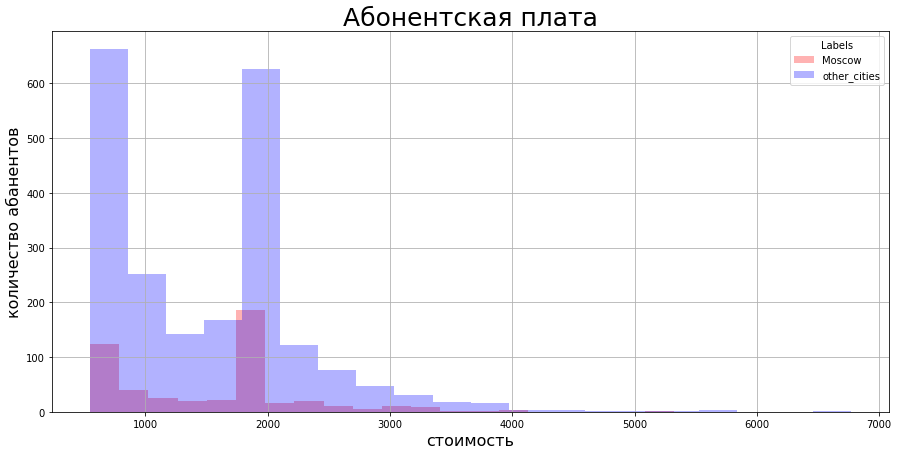

In [32]:
#Гистограмма
df_cost_pivot_table_users_moscow['total_cost'].hist(bins=20,figsize=(15,7),alpha=0.3,color="r",label='ultra')
df_cost_pivot_table_users_other_city['total_cost'].hist(bins=20,figsize=(15,7),alpha=0.3,color="b",label='smart')
plt.legend(['Moscow', 'other_cities'],loc='upper right', title='Labels')

# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('стоимость', fontsize=16)
plt.ylabel('количество абанентов', fontsize=16)
plt.title('Абонентская плата', fontsize=25);

Есть основание полагать, что нулевая гипотеза верна. Выручка пользователей из Москвы равна выручке пользователей из других регионов.

### Общий вывод
<br>

На первом шаге исследования был проведен анализ исходных данных и выявлены проблемы. На втором шаге были проведены необходимые изменения в данных, проведен дорасчет величин и составлена сводная таблица для дальнейшего анализа. 
<br><br>
Абонентам тарифа ultra в среднем требуется:
* пакет интернета - 19 Гб
* пакет сообщений - 60 сообщений
* количество минут - 560 минут
<br><br>
Абонентам тарифа smart в среднем требуется:
* пакет интернета - 16 Гб
* пакет сообщений - 40 сообщений
* количество минут - 420 минут
<br><br>
Были выдвинуты две гипотезы:
<br>
Сформулируем нулевую гипотезу H0: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны.<br>
Сформулируем альтернативную гипотезу H1: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.
<br>
Сформулируем нулевую гипотезу H0: Cредняя выручка пользователей из Москвы равна выручки пользователей из других регионов.<br>
Сформулируем альтернативную гипотезу H1: Cредняя выручка пользователей из Москвы не равна выручки пользователей из других регионов.
<br>
По результатам есть основание полагать, что первая нулевая гипотеза не верна. Таким образом, есть основания предполагать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны. 
<br>
По результатам есть основание полагать, что вторая нулевая гипотеза верна,т.е. выручка пользователей из Москвы равна выручке пользователей из других регионов.
<br>
Тариф smart является более популярным, предпочтительным и выгодным. Если предположить, что абонент использует тариф smart, но со средними показателями как для тарифа ultra, это будет дешевле, чем абоненская плата тарифа ультра. При сравнении средних показателей обоих тарифов можно увидеть, что разница приблизительно в 3 Гб, 20 сообщений и 120 минут при пересчете с учетом extra пакета smart абонент заплатит 1174 рублей вместо 1950 за тариф ultra. 

In [33]:
#Расчет для абонента тарифа smart, если его расход по сообщениям, 
# минутам и трафику как у среднего абонента ultra
extra_mean_cost_smart = ((mean_traffic_ultra - mean_traffic_smart)/1024*df_tariffs['rub_per_gb'][0]
                         +(mean_messages_ultra - mean_messages_smart)*df_tariffs['rub_per_message'][0]
                         +(mean_calls_ultra - mean_calls_smart)*df_tariffs['rub_per_minute'][0]
                         +df_tariffs['rub_monthly_fee'][0])
extra_mean_cost_smart

1174.1870809260597